<a href="https://colab.research.google.com/github/RajanTucker/RajanTucker/blob/main/Spam_Ham__Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing Libraries :***
Python libraries make it very easy for us to handle the data and perform typical and complex tasks with a single line of code.

Seaborn/Wordcloud >>> This library is used to draw visualizations.

NLTK >>> Natural Language Tool Kit provides various functions to process the raw textual data.

TensorFlow : works like a computational library for writing new algorithms that involve a large number of tensor operations, since neural networks can be easily expressed as computational graphs they can be implemented using TensorFlow as a series of operations on Tensors. Plus, tensors are N-dimensional matrices which represent your data.

Numphy-This interface can be utilized for expressing images, sound waves, and other binary raw streams as an array of real numbers in N-dimensional.
Keras: It provides an easier mechanism to express neural networks. Keras also provides some of the best utilities for compiling models, processing data-sets, visualization of graphs, and much more.

Pandas: Pandas make sure that the entire process of manipulating data will be easier. Support for operations such as Re-indexing, Iteration, Sorting, Aggregations, Concatenations and Visualizations are among the feature highlights of Pandas.

NuPIC: The NuPIC library facilitates the development of smart applications with the ability to recognize trends over time and extrapolate future outcomes from real-time data.

Matplotlib is a library for Python that has everything you need to make static, animated, and interactive visualizations.


In [271]:
import numpy as np # for array
import pandas as pd # for data frame to structure data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')


## **Raj** --Loading Dataset ie clusterdata.csv

In [272]:
cluster_df=pd.read_csv('/content/sample_data/clusterdata.csv')

# ***Output Below***

In [273]:
cluster_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [274]:
cluster_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [275]:
cluster_df.head()


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [276]:
cluster_df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


**To check how many such tweets data we have let’s print the shape of the data frame.**

In [277]:
cluster_df.shape

(5728, 2)

In [278]:
cluster_df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [279]:

cluster_df= cluster_df.where((pd.notnull(cluster_df)),"")

In [280]:
print("no of rows",len(cluster_df))

no of rows 5728


In [281]:
cluster_df.isnull().sum()

text    0
spam    0
dtype: int64

Text(0.5, 0, 'HAM / SPAM')

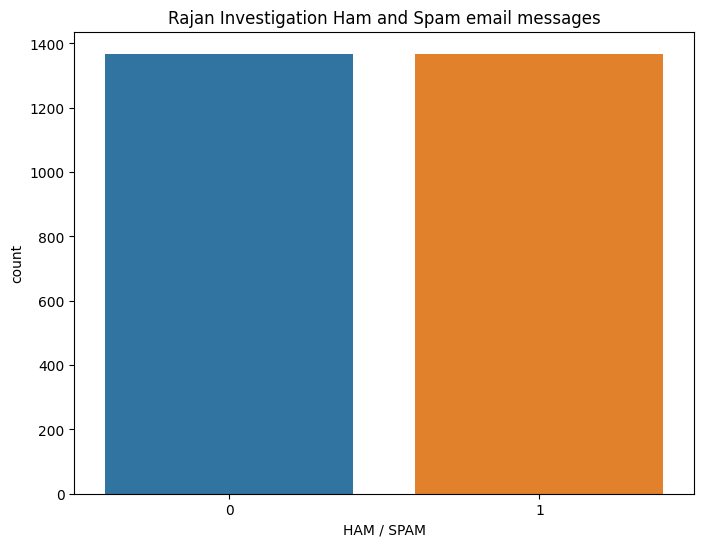

In [282]:
raj_ham_email = cluster_df[cluster_df.spam == 0]
raj_spam_email = cluster_df[cluster_df.spam == 1]
ham_email = raj_ham_email.sample(n=len(raj_spam_email),
                         random_state=42)

# Plotting the counts of down sampled dataset
balanced_data = ham_email.append(raj_spam_email)\
    .reset_index(drop=True)
plt.figure(figsize=(8, 6))
sns.countplot(data = balanced_data, x='spam')
plt.title('Rajan Investigation Ham and Spam email messages')
plt.xlabel('HAM / SPAM')


# **For a better understanding, we’ll plot these counts:**

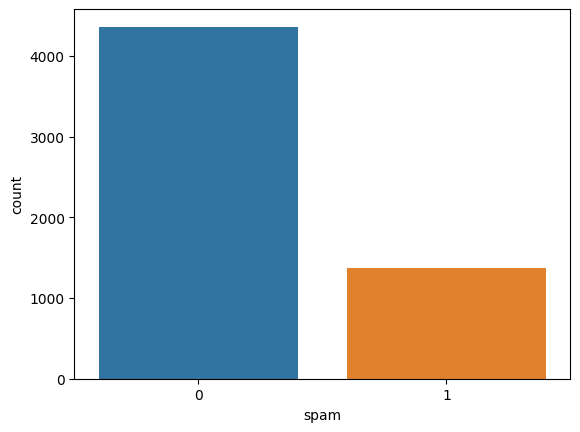

In [283]:
sns.countplot(x='spam', data=cluster_df)
plt.show()


In [284]:
punctuations_list = string.punctuation
def remove_punctuations(text):
    junk = str.maketrans('', '', punctuations_list)
    return text.translate(junk)

balanced_data['text']= balanced_data['text'].apply(lambda x: remove_punctuations(x))
balanced_data.head()

,text,spam
0,Subject interview schedule for jinbaek kim i ...,0
1,Subject re wednesday meeting eric i think ...,0
2,Subject re london research group i d do it ...,0
3,Subject re congratulations vince thanks for...,0
4,Subject osman sezgen steve kromer is requesti...,0


In [285]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [286]:
def remove_stopwords(text):
    junk_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()

        if word not in junk_words:
            imp_words.append(word)

    output = " ".join(imp_words)

    return output


balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))
balanced_data.head()

,text,spam
0,subject interview schedule jinbaek kim see wen...,0
1,subject wednesday meeting eric think skip meet...,0
2,subject london research group soon possible ca...,0
3,subject congratulations vince thanks note cong...,0
4,subject osman sezgen steve kromer requesting o...,0


In [287]:
balanced_data['text'] = balanced_data['text'].str.replace('Subject', '')
balanced_data.head()

,text,spam
0,subject interview schedule jinbaek kim see wen...,0
1,subject wednesday meeting eric think skip meet...,0
2,subject london research group soon possible ca...,0
3,subject congratulations vince thanks note cong...,0
4,subject osman sezgen steve kromer requesting o...,0


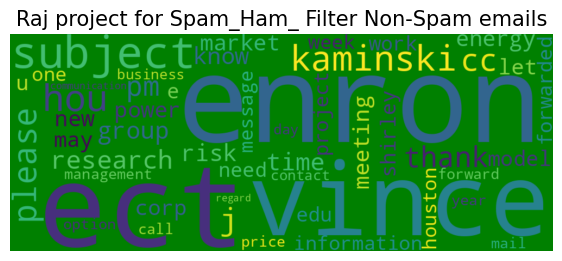

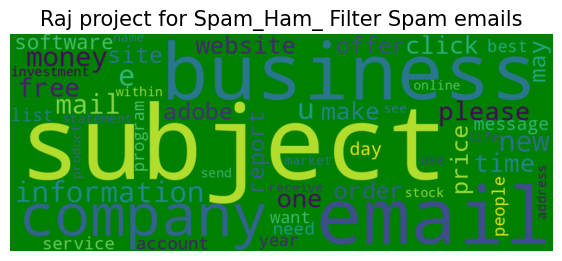

In [288]:
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['text'])

    plt.figure(figsize=(7, 7))

    wc = WordCloud(background_color='green',
                   max_words=50,
                   width=1000,
                   height=400,
                   collocations=False).generate(email_corpus)

    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Raj project for Spam_Ham_ Filter {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()

plot_word_cloud(balanced_data[balanced_data['spam'] == 0], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['spam'] == 1], typ='Spam')

In [289]:

train_X, test_X, train_Y, test_Y = train_test_split(balanced_data['text'],
                                                    balanced_data['spam'],
                                                    test_size = 0.2,
                                                    random_state = 42)

In [290]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

# Pad sequences to have the same length
max_len = 100  # maximum sequence length
train_sequences = pad_sequences(train_sequences,
                                maxlen=max_len,
                                padding='post',
                                truncating='post')
test_sequences = pad_sequences(test_sequences,
                               maxlen=max_len,
                               padding='post'),

In [291]:
cluster_df['length']=cluster_df['text'].apply(len)

<Axes: ylabel='Frequency'>

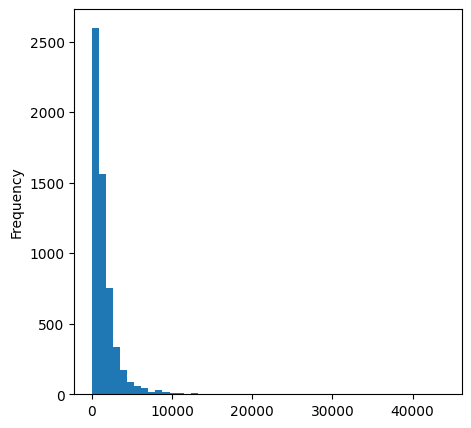

In [292]:
cluster_df['length'].plot(bins=50,kind='hist',figsize=(5,5))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

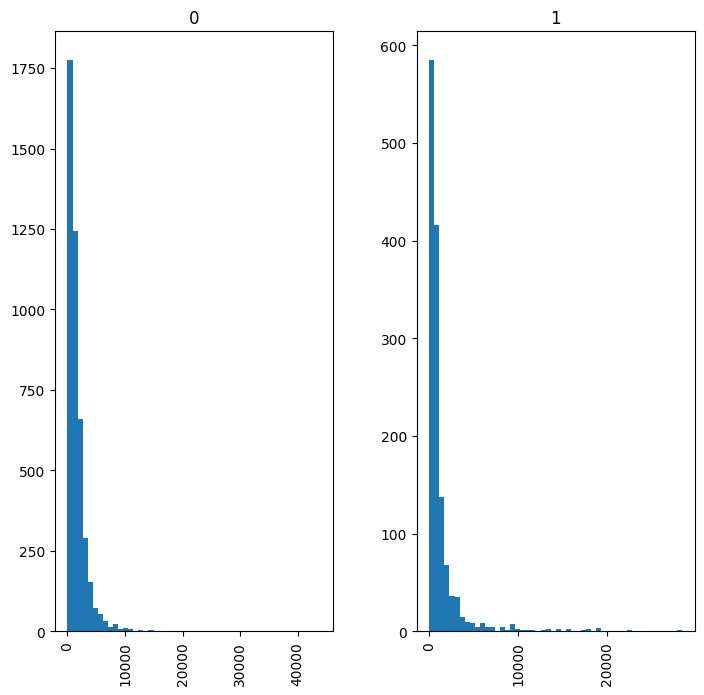

In [293]:
cluster_df.hist(column='length',by='spam',bins=50,figsize=(8,8))

In [294]:
cluster_df.loc[:,'spam']=cluster_df.spam.map({'Ham':0,'Spam':1})

In [295]:
x= cluster_df['text'].values
y= cluster_df['spam'].values

# Raj wants Implimentation of Machine learning model

In [296]:
from IPython.utils import text

count=CountVectorizer()
input=['Subject: re : receipts from visit jim , than...']
Subject=count.fit_transform(cluster_df["text"])
x_train, x_test, y_train, y_test= train_test_split(cluster_df['text'], cluster_df['spam'], test_size=0.20, random_state=1)
Subject

<5728x37303 sparse matrix of type '<class 'numpy.int64'>'
	with 708380 stored elements in Compressed Sparse Row format>

In [297]:
x_train=count.fit_transform(x_train)
x_test=count.fit_transform(x_test)

In [298]:
x_train

<4582x33622 sparse matrix of type '<class 'numpy.int64'>'
	with 566081 stored elements in Compressed Sparse Row format>

In [299]:
print(x_train.shape)
print(x_test.shape )

(4582, 33622)
(1146, 17491)


In [300]:
# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,
                                    output_dim=32,
                                    input_length=max_len))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           805024    
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 808,737
Trainable params: 808,737
Non-trainable params: 0
_________________________________________________________________


In [301]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'],
              optimizer = 'adam')

In [302]:
es = EarlyStopping(patience=3,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
                       monitor = 'val_loss',
                       factor = 0.5,
                       verbose = 0)

In [303]:
# Train the model
history = model.fit(train_sequences, train_Y,
                    validation_data=(test_sequences, test_Y),
                    epochs=20,
                    batch_size=32,
                    callbacks = [lr, es]
                   )

Epoch 1/20
69/69 [==============================] - 9s 80ms/step - loss: 0.6732 - accuracy: 0.6037 - val_loss: 0.6241 - val_accuracy: 0.6588 - lr: 0.0010
Epoch 2/20
69/69 [==============================] - 5s 66ms/step - loss: 0.3486 - accuracy: 0.8789 - val_loss: 0.2965 - val_accuracy: 0.9142 - lr: 0.0010
Epoch 3/20
69/69 [==============================] - 6s 89ms/step - loss: 0.1771 - accuracy: 0.9525 - val_loss: 0.2872 - val_accuracy: 0.9234 - lr: 0.0010
Epoch 4/20
69/69 [==============================] - 4s 64ms/step - loss: 0.1394 - accuracy: 0.9680 - val_loss: 0.2480 - val_accuracy: 0.9288 - lr: 0.0010
Epoch 5/20
69/69 [==============================] - 5s 65ms/step - loss: 0.1726 - accuracy: 0.9548 - val_loss: 0.1916 - val_accuracy: 0.9544 - lr: 0.0010
Epoch 6/20
69/69 [==============================] - 6s 91ms/step - loss: 0.0713 - accuracy: 0.9863 - val_loss: 0.1484 - val_accuracy: 0.9617 - lr: 0.0010
Epoch 7/20
69/69 [==============================] - 5s 67ms/step - loss: 0.0

In [304]:
 #Evaluate the model
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

18/18 [==============================] - 0s 18ms/step - loss: 0.1567 - accuracy: 0.9653
Test Loss : 0.15669222176074982
Test Accuracy : 0.9653284549713135


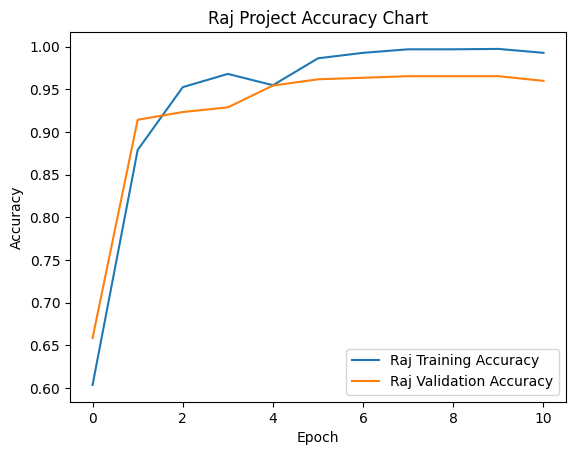

In [307]:
plt.plot(history.history['accuracy'], label='Raj Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Raj Validation Accuracy')
plt.title('Raj Project Accuracy Chart')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()